# <b>Assignment : DT</b>

<font color='red'><b> Please check below video before attempting this assignment</b></font>

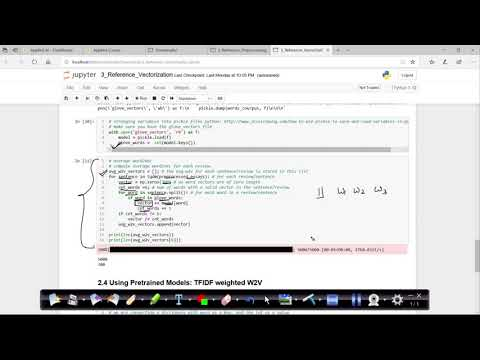

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('ZhLXULFjIjQ', width="1000",height="500")

<font color='red'><b> TF-IDFW2V</b></font>

<b>Tfidf w2v (w1,w2..) = (tfidf(w1) * w2v(w1) + tfidf(w2) * w2v(w2) + …)  /    (tfidf(w1) + tfidf(w2) + …)</b>

<b>(Optional) Please check course video on [AVgw2V and TF-IDFW2V ](https://www.appliedaicourse.com/lecture/11/applied-machine-learning-online-course/2916/avg-word2vec-tf-idf-weighted-word2vec/3/module-3-foundations-of-natural-language-processing-and-machine-learning)for more details.

<font color='blue'><b>Glove vectors </b></font>

<b>In this assignment you will be working with glove vectors , please check  [this](https://en.wikipedia.org/wiki/GloVe_(machine_learning)) and [this](https://en.wikipedia.org/wiki/GloVe_(machine_learning)) for more details.</b><br>

Download glove vectors from this [link ](https://drive.google.com/file/d/1lDca_ge-GYO0iQ6_XDLWePQFMdAA2b8f/view?usp=sharing)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix

from scipy.sparse import csr_matrix
from scipy.sparse import hstack
from scipy.sparse import vstack

import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer


import seaborn as sns

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [4]:
#please use below code to load glove vectors 
with open('/content/drive/MyDrive/9_Donors_choose_DT/glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

or else , you can use below code

In [5]:
'''
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!

# ============================

words = []
for i in preproced_texts:
    words.extend(i.split(' '))

for i in preproced_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


'''

'\n# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039\ndef loadGloveModel(gloveFile):\n    print ("Loading Glove Model")\n    f = open(gloveFile,\'r\', encoding="utf8")\n    model = {}\n    for line in tqdm(f):\n        splitLine = line.split()\n        word = splitLine[0]\n        embedding = np.array([float(val) for val in splitLine[1:]])\n        model[word] = embedding\n    print ("Done.",len(model)," words loaded!")\n    return model\nmodel = loadGloveModel(\'glove.42B.300d.txt\')\n\n# ============================\nOutput:\n    \nLoading Glove Model\n1917495it [06:32, 4879.69it/s]\nDone. 1917495  words loaded!\n\n# ============================\n\nwords = []\nfor i in preproced_texts:\n    words.extend(i.split(\' \'))\n\nfor i in preproced_titles:\n    words.extend(i.split(\' \'))\nprint("all the words in the coupus", len(words))\nwords = set(words)\nprint("the unique words in the coupus", len(words))\n\ninter_words = set(model.keys()).intersection(word

# <font color='red'> <b>Task - 1</b></font>

<ol>
    <li><strong>Apply Decision Tree Classifier(DecisionTreeClassifier) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features +  preprocessed_essay (TFIDF) + Sentiment scores(preprocessed_essay)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features +  preprocessed_essay (TFIDF W2V) + Sentiment scores(preprocessed_essay)</li>        </ul>
    </li>
    <li><strong>The hyper paramter tuning (best `depth` in range [1, 3, 10, 30], and the best `min_samples_split` in range [5, 10, 100, 500])</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>find the best hyper paramter using k-fold cross validation(use gridsearch cv or randomsearch cv)/simple cross validation data(you can write your own for loops refer sample solution)</li>
        </ul>
    </li>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/Gp2DQmh.jpg' width=500px> with X-axis as <strong>min_sample_split</strong>, Y-axis as <strong>max_depth</strong>, and Z-axis as <strong>AUC Score</strong> , we have given the notebook which explains how to plot this 3d plot, you can find it in the same drive <i>3d_scatter_plot.ipynb</i></li>
            <p style="text-align:center;font-size:30px;color:red;"><strong>or</strong></p> <br>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/fgN9aUP.jpg' width=300px> <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heat maps</a> with rows as <strong>min_sample_split</strong>, columns as <strong>max_depth</strong>, and values inside the cell representing <strong>AUC Score</strong> </li>
    <li>You choose either of the plotting techniques out of 3d plot or heat map</li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
        Make sure that you are using predict_proba method to calculate AUC curves, because AUC is calcualted on class probabilities and not on class labels.
    <img src='https://i.imgur.com/wMQDTFe.jpg' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='https://i.imgur.com/IdN5Ctv.png' width=300px></li>
    <li>Once after you plot the confusion matrix with the test data, get all the `false positive data points`
        <ul>
            <li> Plot the WordCloud(https://www.geeksforgeeks.org/generating-word-cloud-python/) with the words of essay text of these `false positive data points`</li>
            <li> Plot the box plot with the `price` of these `false positive data points`</li>
            <li> Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`</li>
        </ul>
        </ul>
    </li>
   

### Apply Decision Tree Classifier(DecisionTreeClassifier) on these feature sets

# <font color='red'> <b>Task - 1</b></font>



In [ ]:
# write your code in following steps for task 1
# 1. calculate sentiment scores for the essay feature 
# 2. Split your data.
# 3. perform tfidf vectorization of text data.
# 4. perform tfidf w2v vectorization of text data.
# 5. perform encoding of categorical features.
# 6. perform encoding of numerical features
# 7. For task 1 set 1 stack up all the features
# 8. For task 1 set 2 stack up all the features (for stacking dense features you can use np.stack)
# 9. Perform hyperparameter tuning and plot either heatmap or 3d plot.
# 10. Find the best parameters and fit the model. Plot ROC-AUC curve(using predict proba method)
# 11. Plot confusion matrix based on best threshold value
# 12. Find all the false positive data points and plot wordcloud of essay text and pdf of teacher_number_of_previously_posted_projects.
# 13. Write your observations about the wordcloud and pdf.

# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [6]:
sid = SentimentIntensityAnalyzer()

In [7]:
df = pd.read_csv('/content/drive/MyDrive/9_Donors_choose_DT/preprocessed_data.csv')
y = df['project_is_approved']
X = df.drop(columns=['project_is_approved'])

### Calculation of sentimental scores

In [8]:

negative = []
positive = []
neutral = []
compound = []

def update_sentiments(values):
    negative.append(values["neg"])    
    positive.append(values["pos"])
    neutral.append(values["neu"])
    compound.append(values["compound"])

for essay in tqdm(X["essay"]):
    update_sentiments(sid.polarity_scores(essay))


100%|██████████| 109248/109248 [03:58<00:00, 457.27it/s]


### Adding sentimental columns

In [9]:
X["neg"] = negative
X["pos"] = positive
X["neu"] = neutral       
X["compound"] = compound

X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,random_state=42,test_size = 0.33)

In [10]:
print('\n Shape of the data: ', X.shape,y.shape)
print('\n Shape of the train data: ', X_train.shape, y_train.shape )
print('\n Shape of the test data: ', X_test.shape, y_test.shape )


 Shape of the data:  (109248, 12) (109248,)

 Shape of the train data:  (73196, 12) (73196,)

 Shape of the test data:  (36052, 12) (36052,)


### OHE of categorical features

In [11]:
cat_features = ['school_state', 'teacher_prefix', 'project_grade_category', 'clean_categories','clean_subcategories']
ohe_vectorizer = CountVectorizer(binary=True)
ohe_train = []
ohe_test = []
for i,feature in enumerate(cat_features):
  print(i,feature)    
  train = X_train[feature]
  test = X_test[feature]
  ohe_train.append(ohe_vectorizer.fit_transform(train))
  ohe_test.append(ohe_vectorizer.transform(test))
  print("Train:",ohe_train[i].shape)
  print("Test:",ohe_test[i].shape)

0 school_state
Train: (73196, 51)
Test: (36052, 51)
1 teacher_prefix
Train: (73196, 5)
Test: (36052, 5)
2 project_grade_category
Train: (73196, 4)
Test: (36052, 4)
3 clean_categories
Train: (73196, 9)
Test: (36052, 9)
4 clean_subcategories
Train: (73196, 30)
Test: (36052, 30)


### tf-idf of preprocessed_essays

In [12]:
preprocessed_essays_train = X_train['essay'].values
preprocessed_essays_test = X_test['essay'].values
print('Train:',preprocessed_essays_train.shape)
print('Test:',preprocessed_essays_test.shape)
vectorizer = TfidfVectorizer(min_df=10,max_features=6000)
train_tfidf_vec = vectorizer.fit_transform(preprocessed_essays_train)
print("Shape of train matrix after one hot encodig ",train_tfidf_vec.shape)
test_tfidf_vec= vectorizer.transform(preprocessed_essays_test)
print("Shape of test matrix after one hot encodig ",test_tfidf_vec.shape)

Train: (73196,)
Test: (36052,)
Shape of train matrix after one hot encodig  (73196, 6000)
Shape of test matrix after one hot encodig  (36052, 6000)


### tf-idf w2v of preprocessed_essays


In [13]:
preprocessed_essays_train = X_train['essay'].values
preprocessed_essays_test = X_test['essay'].values
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_essays_train)
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [14]:
def tfidf_w2v_converter(glove_words,tfidf_words,preprocessed_text):
  # For train data
  # average Word2Vec
  # compute average word2vec for each review.
  tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
  for sentence in tqdm(preprocessed_text): # for each review/sentence
      vector = np.zeros(300) # as word vectors are of zero length
      tf_idf_weight =0; # num of words with a valid vector in the sentence/review
      for word in sentence.split(): # for each word in a review/sentence
          if (word in glove_words) and (word in tfidf_words):
              vec = model[word] # getting the vector for each word
              # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
              tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
              vector += (vec * tf_idf) # calculating tfidf weighted w2v
              tf_idf_weight += tf_idf
      if tf_idf_weight != 0:
          vector /= tf_idf_weight
      tfidf_w2v_vectors.append(vector)
  print(len(tfidf_w2v_vectors))
  print(len(tfidf_w2v_vectors[0]))
  return tfidf_w2v_vectors

In [15]:
train_tfidf_w2v_vec = tfidf_w2v_converter(glove_words,tfidf_words,preprocessed_essays_train)
test_tfidf_w2v_vec = tfidf_w2v_converter(glove_words,tfidf_words,preprocessed_essays_test)

100%|██████████| 73196/73196 [02:56<00:00, 414.95it/s]


73196
300


100%|██████████| 36052/36052 [01:25<00:00, 422.27it/s]

36052
300


### stacking cat+num features

In [16]:
X_train.columns

Index(['school_state', 'teacher_prefix', 'project_grade_category',
       'teacher_number_of_previously_posted_projects', 'clean_categories',
       'clean_subcategories', 'essay', 'price', 'neg', 'pos', 'neu',
       'compound'],
      dtype='object')

In [17]:
#Train
num_features = csr_matrix(X_train[['price','teacher_number_of_previously_posted_projects','pos','neg','neu','compound']].values)
cat_features = hstack((ohe_train))
num_cat_features_train = hstack((num_features,cat_features))

#test
num_features = csr_matrix(X_test[['price','teacher_number_of_previously_posted_projects','pos','neg','neu','compound']].values)
cat_features = hstack((ohe_test))
num_cat_features_test = hstack((num_features,cat_features))

In [18]:
num_cat_features_train

<73196x105 sparse matrix of type '<class 'numpy.float64'>'
	with 852620 stored elements in COOrdinate format>

In [19]:
num_cat_features_test

<36052x105 sparse matrix of type '<class 'numpy.float64'>'
	with 419645 stored elements in COOrdinate format>

### Set 1 num_cat_features + tfidf_text
### Set 2 num_cat_features + tfidf_w2v_text





In [20]:
set1_train = hstack((num_cat_features_train,train_tfidf_vec))
set1_test = hstack((num_cat_features_test,test_tfidf_vec))
set2_train = hstack((num_cat_features_train,train_tfidf_w2v_vec))
set2_test = hstack((num_cat_features_test,test_tfidf_w2v_vec))

In [21]:
print(set1_train.shape,
set2_train.shape,
set1_test.shape,
set2_test.shape)

(73196, 6105) (73196, 405) (36052, 6105) (36052, 405)


In [22]:
from pandas.core.common import random_state
DT = DecisionTreeClassifier(random_state=3,class_weight='balanced')
parameters = {'max_depth': [1, 3, 10, 30],'min_samples_split':[5, 10, 100, 500]}
clf1 = GridSearchCV(DT,param_grid=parameters,scoring='roc_auc',return_train_score=True,n_jobs=-1)
clf2 = GridSearchCV(DT,param_grid=parameters,scoring='roc_auc',return_train_score=True,n_jobs=-1)

### Fitting set1 train data




In [23]:
clf1.fit(set1_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=3),
             n_jobs=-1,
             param_grid={'max_depth': [1, 3, 10, 30],
                         'min_samples_split': [5, 10, 100, 500]},
             return_train_score=True, scoring='roc_auc')

### Fitting set2 train data

In [24]:
clf2.fit(set2_train,y_train)

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


GridSearchCV(estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=3),
             n_jobs=-1,
             param_grid={'max_depth': [1, 3, 10, 30],
                         'min_samples_split': [5, 10, 100, 500]},
             return_train_score=True, scoring='roc_auc')

In [25]:
clf1_results = pd.DataFrame(clf1.cv_results_)

In [26]:
clf2_results = pd.DataFrame(clf2.cv_results_)


In [58]:

clf1.best_params_

{'max_depth': 10, 'min_samples_split': 500}

In [28]:
clf2.best_params_

{'max_depth': 10, 'min_samples_split': 500}

### Retraining the model with best parameters

In [29]:
DT1 = DecisionTreeClassifier(random_state=3,class_weight='balanced',min_samples_split=clf1.best_params_['min_samples_split'],max_depth=clf1.best_params_['max_depth'])
DT2 = DecisionTreeClassifier(random_state=3,class_weight='balanced',min_samples_split=clf2.best_params_['min_samples_split'],max_depth=clf2.best_params_['max_depth'])

### Refitting the model with best parameters

In [30]:
DT1.fit(set1_train,y_train)
DT2.fit(set2_train,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                       min_samples_split=500, random_state=3)

### Function to find best threshold and predictions using best threshold

In [115]:
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

### SET1

Heatmap

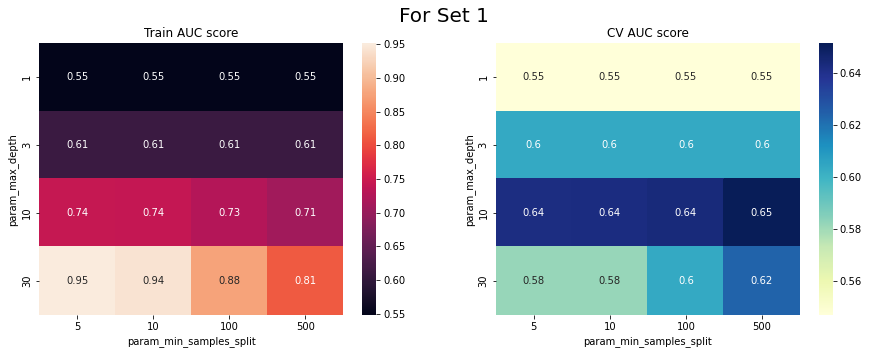

In [146]:
from IPython.core.pylabtools import figsize
train_score_1 = clf1_results['mean_train_score']
cv_score_1 = clf1_results['mean_test_score']
x = clf1_results['param_max_depth']
y = clf1_results['param_min_samples_split']
plt.figure(figsize=(15,5))
plt.suptitle('For Set 1',fontsize=20)
plt.subplot(1,2,1)
ax1 = sns.heatmap(clf1_results.pivot("param_max_depth","param_min_samples_split","mean_train_score"),annot=True)
plt.title('Train AUC score')
plt.subplot(1,2,2)
ax2 = sns.heatmap(clf1_results.pivot("param_max_depth","param_min_samples_split","mean_test_score"),annot=True,cmap="YlGnBu")
plt.title('CV AUC score')
plt.show()

ROC Curve

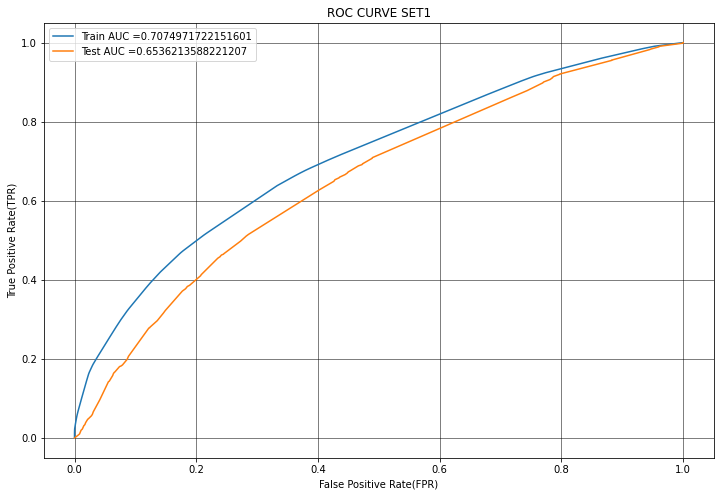

In [147]:
y_train_probs = DT1.predict_proba(set1_train)[:,1] # converting train and test output into probability
y_test_probs= DT1.predict_proba(set1_test)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_probs) # storing values of fpr and tpr
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_probs)

plt.figure(figsize=(12,8))
plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("ROC CURVE SET1")
plt.grid(color='black',lw=0.5)

Confusion Matrix

In [148]:
best_t_train = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
cm_train=confusion_matrix(y_train,predict_with_best_t(y_train_probs, best_t_train))  # https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
best_t_test = find_best_threshold(te_thresholds, test_fpr, test_tpr)
cm_test=confusion_matrix(y_test,predict_with_best_t(y_test_probs, best_t_test))
print("CONFUSION MATRIX OF TRAIN DATA")
print("\n")
print(cm_train)
print("CONFUSION MATRIX OF TEST DATA")
print('\n')
print(cm_test)


the maximum value of tpr*(1-fpr) 0.42587173930576616 for threshold 0.509
the maximum value of tpr*(1-fpr) 0.3753091775625201 for threshold 0.509
CONFUSION MATRIX OF TRAIN DATA


[[ 7393  3690]
 [22458 39655]]
CONFUSION MATRIX OF TEST DATA


[[ 3262  2197]
 [11378 19215]]


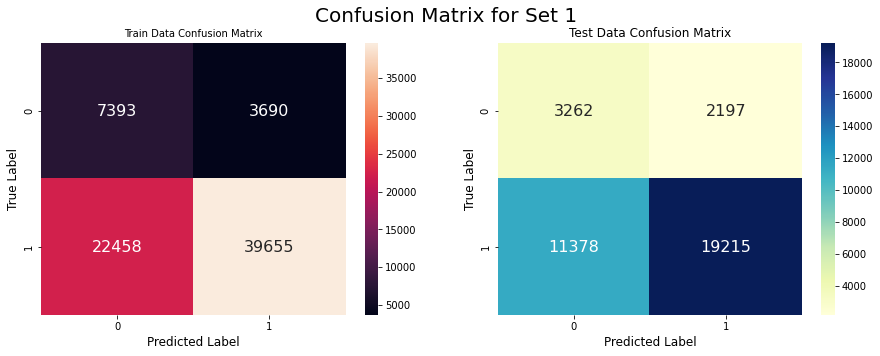

In [149]:
plt.figure(figsize=(15,5))
plt.suptitle('Confusion Matrix for Set 1',fontsize=20)
plt.subplot(1,2,1)
sns.heatmap(cm_train, annot=True, fmt='d',annot_kws = {"size":16})
plt.ylabel('True Label',size=12)
plt.xlabel('Predicted Label',size=12)
plt.title('Train Data Confusion Matrix',size=10)
plt.subplot(1,2,2)
sns.heatmap(cm_test, annot=True, fmt='d',annot_kws = {"size":16},cmap="YlGnBu")
plt.ylabel('True Label',size=12)
plt.xlabel('Predicted Label',size=12)
plt.title('Test Data Confusion Matrix',size=12)
plt.show()

False positive points

In [120]:
predict=predict_with_best_t(y_test_probs,best_t_test)
predict=np.array(predict)
data = {'predict':predict,'y_test':y_test}
data = pd.DataFrame(data)
fpi = data[(data['predict']==1) & (data['y_test']==0)]
fpi = X.iloc[fpi.index]
fpi.head(2)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,essay,price,neg,pos,neu,compound
69487,sc,mrs,grades_3_5,10,literacy_language math_science,literacy mathematics,many students english language learners hard w...,228.89,0.039,0.242,0.719,0.9794
15540,va,ms,grades_3_5,0,specialneeds,specialneeds,my student walking classroom feel safe they al...,108.89,0.031,0.369,0.601,0.9945


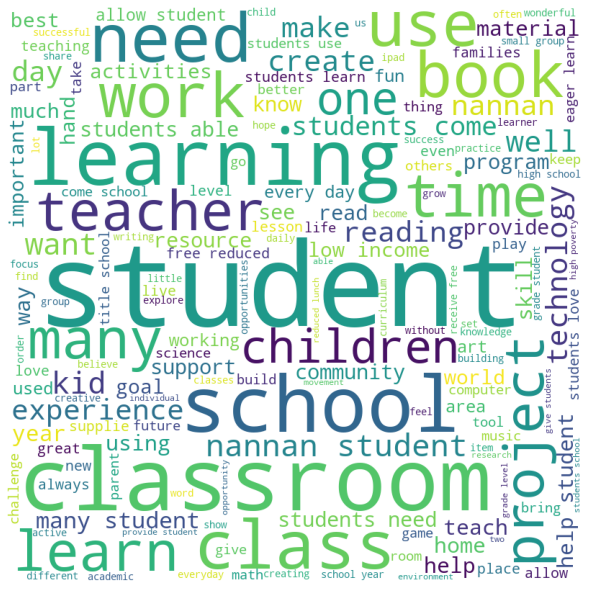

In [121]:
from wordcloud import WordCloud, STOPWORDS 
comment_words = ' '
stopwords = set(STOPWORDS)
for word in fpi['essay']:
    val = str(word)                #https://www.geeksforgeeks.org/generating-word-cloud-python/
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    for words in tokens:
        comment_words = comment_words + words + ' '
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords, min_font_size = 10).generate(comment_words)
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


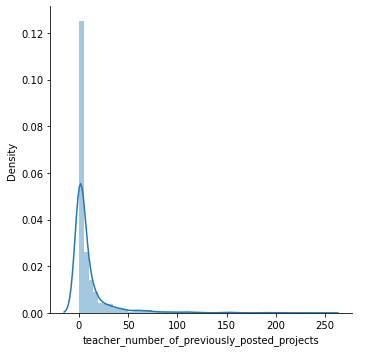

[8.86663632e-01 6.41784251e-02 2.36686391e-02 9.55848885e-03
 7.28265817e-03 1.82066454e-03 3.64132909e-03 1.82066454e-03
 4.55166136e-04 9.10332271e-04]
[  0.   24.8  49.6  74.4  99.2 124.  148.8 173.6 198.4 223.2 248. ]


Text(0.5, 0, 'teacher_number_of_previously_posted_projects')

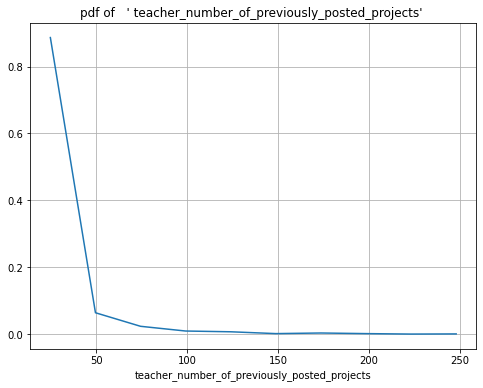

In [122]:
sns.FacetGrid(fpi, size=5) \
   .map(sns.distplot, "teacher_number_of_previously_posted_projects") \
   .add_legend();
plt.show();

plt.figure(figsize=(8,6))
plt.grid()
counts, bin_edges = np.histogram(fpi['teacher_number_of_previously_posted_projects'], bins=10, 
                                density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
plt.plot(bin_edges[1:],pdf)
plt.title("pdf of   ' teacher_number_of_previously_posted_projects' ")
plt.xlabel('teacher_number_of_previously_posted_projects')

###SET2

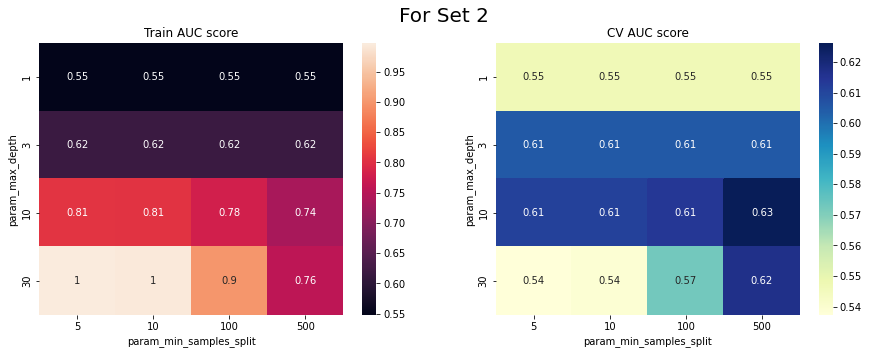

In [123]:
from IPython.core.pylabtools import figsize
train_score_1 = clf1_results['mean_train_score']
cv_score_1 = clf1_results['mean_test_score']
x = clf1_results['param_max_depth']
y = clf1_results['param_min_samples_split']
plt.figure(figsize=(15,5))
plt.suptitle('For Set 2',fontsize=20)
plt.subplot(1,2,1)
ax1 = sns.heatmap(clf2_results.pivot("param_max_depth","param_min_samples_split","mean_train_score"),annot=True)
plt.title('Train AUC score')
plt.subplot(1,2,2)
ax2 = sns.heatmap(clf2_results.pivot("param_max_depth","param_min_samples_split","mean_test_score"),annot=True,cmap="YlGnBu")
plt.title('CV AUC score')
plt.show()

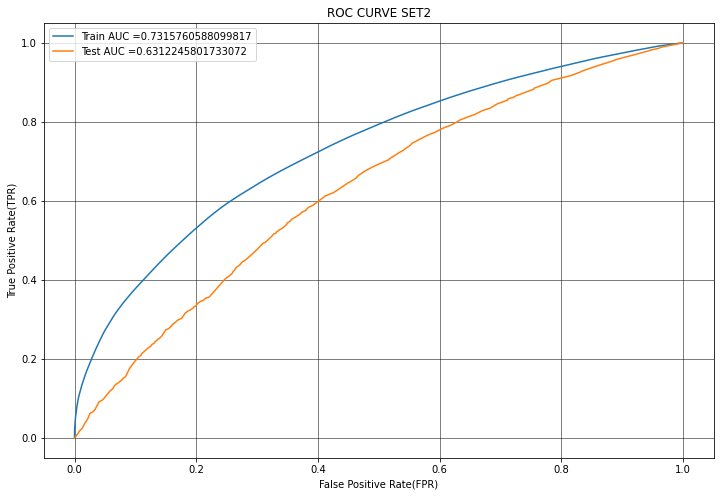

In [124]:
y_train_probs = DT2.predict_proba(set2_train)[:,1] # converting train and test output into probability
y_test_probs= DT2.predict_proba(set2_test)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_probs) # storing values of fpr and tpr
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_probs)

plt.figure(figsize=(12,8))
plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("ROC CURVE SET2")
plt.grid(color='black',lw=0.5)

In [125]:
best_t_train = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
cm_train=confusion_matrix(y_train,predict_with_best_t(y_train_probs, best_t_train))  # https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
best_t_test = find_best_threshold(te_thresholds, test_fpr, test_tpr)
cm_test=confusion_matrix(y_test,predict_with_best_t(y_test_probs, best_t_test))
print("CONFUSION MATRIX OF TRAIN DATA")
print("\n")
print(cm_train)
print("CONFUSION MATRIX OF TEST DATA")
print('\n')
print(cm_test)

the maximum value of tpr*(1-fpr) 0.449156699713844 for threshold 0.482
the maximum value of tpr*(1-fpr) 0.3602830038685701 for threshold 0.485
CONFUSION MATRIX OF TRAIN DATA


[[ 7713  3370]
 [22025 40088]]
CONFUSION MATRIX OF TEST DATA


[[ 3213  2246]
 [11866 18727]]


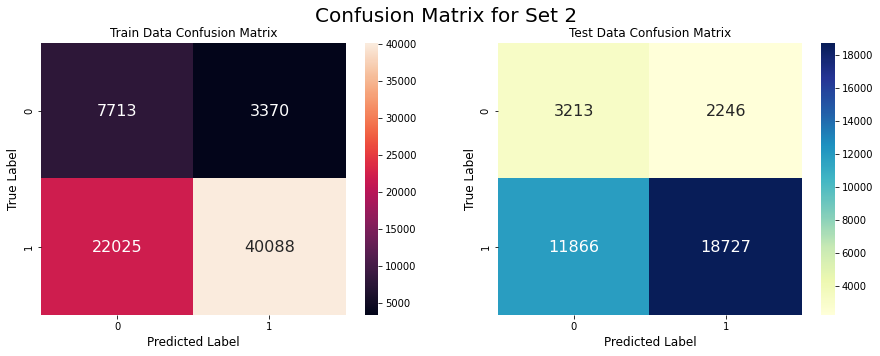

In [126]:
plt.figure(figsize=(15,5))
plt.suptitle('Confusion Matrix for Set 2',fontsize=20)
plt.subplot(1,2,1)
sns.heatmap(cm_train, annot=True, fmt='d',annot_kws = {"size":16})
plt.ylabel('True Label',size=12)
plt.xlabel('Predicted Label',size=12)
plt.title('Train Data Confusion Matrix',size=12)
plt.subplot(1,2,2)
sns.heatmap(cm_test, annot=True, fmt='d',annot_kws = {"size":16},cmap="YlGnBu")
plt.ylabel('True Label',size=12)
plt.xlabel('Predicted Label',size=12)
plt.title('Test Data Confusion Matrix',size=12)
plt.show()

fpi

In [127]:
predict=predict_with_best_t(y_test_probs,best_t_test)
predict=np.array(predict)
data = {'predict':predict,'y_test':y_test}
data = pd.DataFrame(data)
fpi = data[(data['predict']==1) & (data['y_test']==0)]
fpi = X.iloc[fpi.index]
fpi.head(2)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,essay,price,neg,pos,neu,compound
69487,sc,mrs,grades_3_5,10,literacy_language math_science,literacy mathematics,many students english language learners hard w...,228.89,0.039,0.242,0.719,0.9794
78189,fl,mrs,grades_prek_2,1,appliedlearning,earlydevelopment,i teacher low economic school all students fre...,84.32,0.071,0.163,0.766,0.9189


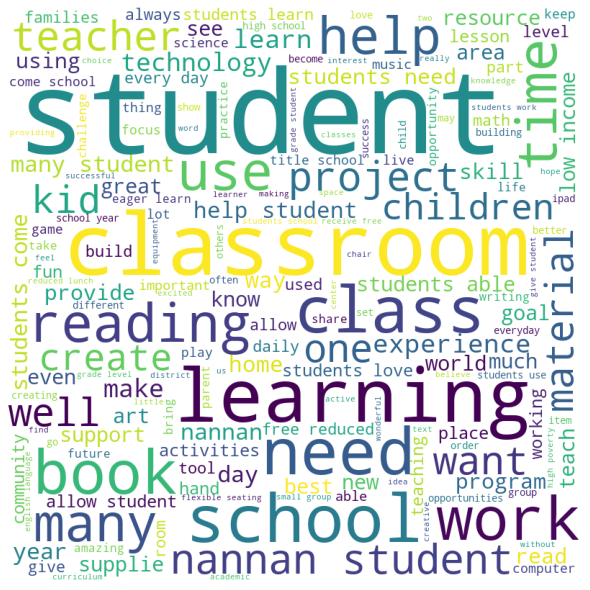

In [128]:
from wordcloud import WordCloud, STOPWORDS 
comment_words = ' '
stopwords = set(STOPWORDS)
for word in fpi['essay']:
    val = str(word)                #https://www.geeksforgeeks.org/generating-word-cloud-python/
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    for words in tokens:
        comment_words = comment_words + words + ' '
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords, min_font_size = 10).generate(comment_words)
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


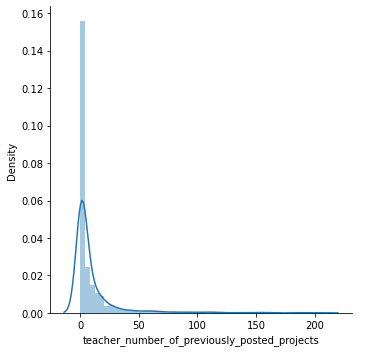

[0.88379341 0.05921638 0.02359751 0.01246661 0.0062333  0.00756901
 0.00178094 0.00311665 0.         0.00222618]
[  0.   20.6  41.2  61.8  82.4 103.  123.6 144.2 164.8 185.4 206. ]


Text(0.5, 0, 'teacher_number_of_previously_posted_projects')

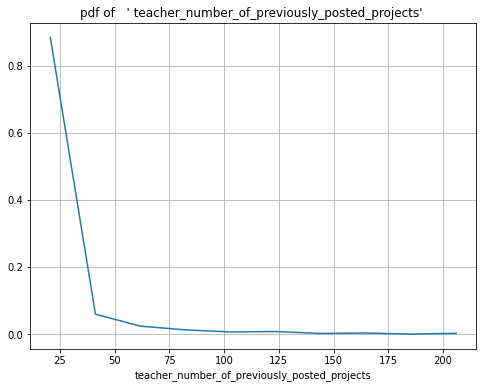

In [129]:
sns.FacetGrid(fpi, size=5) \
   .map(sns.distplot, "teacher_number_of_previously_posted_projects") \
   .add_legend();
plt.show();

plt.figure(figsize=(8,6))
plt.grid()
counts, bin_edges = np.histogram(fpi['teacher_number_of_previously_posted_projects'], bins=10, 
                                density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
plt.plot(bin_edges[1:],pdf)
plt.title("pdf of   ' teacher_number_of_previously_posted_projects' ")
plt.xlabel('teacher_number_of_previously_posted_projects')


# <font color='red'><b> Task - 2 </b></font>

For this task consider **set-1** features.

*  Select all the features which are having non-zero feature importance.You can get the feature importance using  'feature_importances_` 
   (https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), discard the all other remaining features and then apply any of the model of you choice i.e. (Dession tree, Logistic Regression, Linear SVM).
*  You need to do hyperparameter tuning corresponding to the model you selected and procedure in step 2 and step 3<br>
  **Note**: when you want to find the feature importance make sure you don't use max_depth parameter keep it None.
  </li>
    <br>
You need to summarize the results at the end of the notebook, summarize it in the table format
        <img src='http://i.imgur.com/YVpIGGE.jpg' width=400px>
    </li>
</ol>

# <font color='red'> <b>Task - 2</b></font>

In [130]:
# 1. write your code in following steps for task 2
# 2. select all non zero features
# 3. Update your dataset i.e. X_train,X_test and X_cv so that it contains all rows and only non zero features
# 4. perform hyperparameter tuning and plot either heatmap or 3d plot.
# 5. Fit the best model. Plot ROC AUC curve and confusion matrix similar to model 1.


In [131]:
print(len(DT1.feature_importances_))

6105


In [132]:
features = DT1.feature_importances_
non_zero_features=[]
for i in range(len(features)):
    if features[i]>0:             
        non_zero_features.append(i)
print('Total  of non-zero features: ',len(non_zero_features))
set1_train_imp = set1_train.toarray()[:,non_zero_features]
set1_test_imp = set1_test.toarray()[:,non_zero_features]
print(set1_train_imp.shape)
print(set1_test_imp.shape)

Total  of non-zero features:  101
(73196, 101)
(36052, 101)


In [133]:
DT = DecisionTreeClassifier(random_state=3,class_weight='balanced')
parameters = {'max_depth': [1, 3, 10, 30],'min_samples_split':[5, 10, 100, 500]}
clf1_imp = GridSearchCV(DT,param_grid=parameters,scoring='roc_auc',return_train_score=True,n_jobs=-1)

In [134]:
clf1_imp.fit(set1_train_imp,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=3),
             n_jobs=-1,
             param_grid={'max_depth': [1, 3, 10, 30],
                         'min_samples_split': [5, 10, 100, 500]},
             return_train_score=True, scoring='roc_auc')

In [135]:
DT1_imp = DecisionTreeClassifier(random_state=3,class_weight='balanced',min_samples_split=clf1_imp.best_params_['min_samples_split'],max_depth=clf1_imp.best_params_['max_depth'])

In [136]:
DT1_imp.fit(set1_train_imp,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                       min_samples_split=500, random_state=3)

In [137]:
clf1_imp_results = pd.DataFrame(clf1_imp.cv_results_)
clf1_imp.best_params_

{'max_depth': 10, 'min_samples_split': 500}

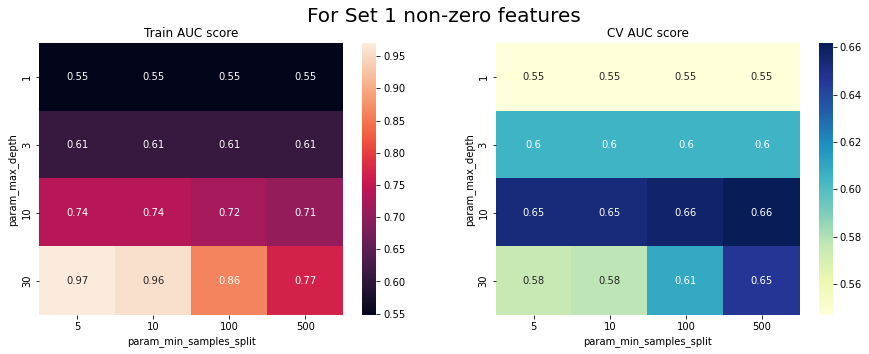

In [138]:
from IPython.core.pylabtools import figsize
train_score_1 = clf1_imp_results['mean_train_score']
cv_score_1 = clf1_imp_results['mean_test_score']
x = clf1_imp_results['param_max_depth']
y = clf1_imp_results['param_min_samples_split']
plt.figure(figsize=(15,5))
plt.suptitle('For Set 1 non-zero features',fontsize=20)
plt.subplot(1,2,1)
ax1 = sns.heatmap(clf1_imp_results.pivot("param_max_depth","param_min_samples_split","mean_train_score"),annot=True)
plt.title('Train AUC score')
plt.subplot(1,2,2)
ax2 = sns.heatmap(clf1_imp_results.pivot("param_max_depth","param_min_samples_split","mean_test_score"),annot=True,cmap="YlGnBu")
plt.title('CV AUC score')
plt.show()

In [139]:
print(y_test.shape)
print(y_test_probs.shape)

(36052,)
(36052,)


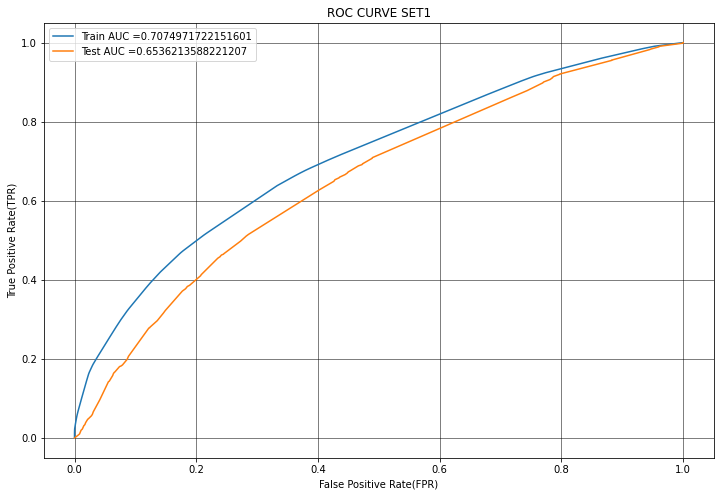

In [140]:
y_train_probs = DT1_imp.predict_proba(set1_train_imp)[:,1] # converting train and test output into probability
y_test_probs= DT1_imp.predict_proba(set1_test_imp)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_probs) # storing values of fpr and tpr
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_probs)

plt.figure(figsize=(12,8))
plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("ROC CURVE SET1")
plt.grid(color='black',lw=0.5)

In [141]:
best_t_train = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
cm_train=confusion_matrix(y_train,predict_with_best_t(y_train_probs, best_t_train))  # https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
best_t_test = find_best_threshold(te_thresholds, test_fpr, test_tpr)
cm_test=confusion_matrix(y_test,predict_with_best_t(y_test_probs, best_t_test))
print("CONFUSION MATRIX OF TRAIN DATA")
print("\n")
print(cm_train)
print("CONFUSION MATRIX OF TEST DATA")
print('\n')
print(cm_test)

the maximum value of tpr*(1-fpr) 0.42587173930576616 for threshold 0.509
the maximum value of tpr*(1-fpr) 0.3753091775625201 for threshold 0.509
CONFUSION MATRIX OF TRAIN DATA


[[ 7393  3690]
 [22458 39655]]
CONFUSION MATRIX OF TEST DATA


[[ 3262  2197]
 [11378 19215]]


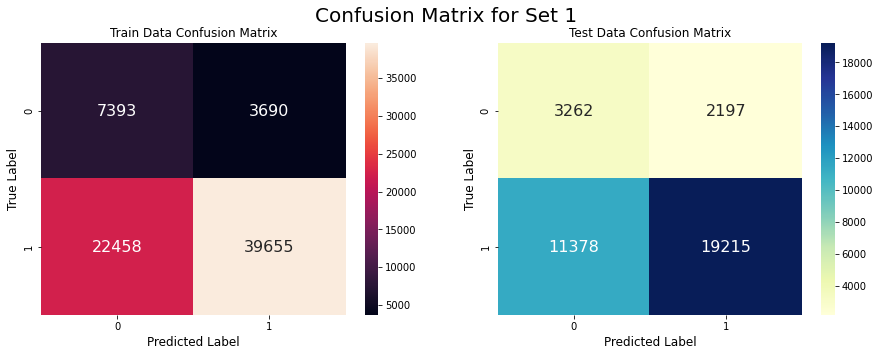

In [142]:
plt.figure(figsize=(15,5))
plt.suptitle('Confusion Matrix for Set 1',fontsize=20)
plt.subplot(1,2,1)
sns.heatmap(cm_train, annot=True, fmt='d',annot_kws = {"size":16})
plt.ylabel('True Label',size=12)
plt.xlabel('Predicted Label',size=12)
plt.title('Train Data Confusion Matrix',size=12)
plt.subplot(1,2,2)
sns.heatmap(cm_test, annot=True, fmt='d',annot_kws = {"size":16},cmap="YlGnBu")
plt.ylabel('True Label',size=12)
plt.xlabel('Predicted Label',size=12)
plt.title('Test Data Confusion Matrix',size=12)
plt.show()

In [143]:
# Tabulate your results

In [144]:
from prettytable import PrettyTable
from prettytable import ALL as ALL
table=PrettyTable(hrules=ALL)
table.field_names = [ "Sl.N0","Vectorizer", "Model", "Hyper Parameter", "Number of features", "Test-AUC"] # # http://zetcode.com/python/prettytable/
table.add_row([1,"TFIDF", "DT", "max_depth =10 , min_samples_split=500",6105, 0.6536])
table.add_row([2,"TFIDF W2V", "DT"," max_depth =10 , min_samples_split=500",405, 0.6312])
table.add_row([3,"TFIDF NON ZERO FEATURE IMPORTANCE", "DT", "max_depth =10 , min_samples_split=500",101, 0.6536])
print(table)

+-------+-----------------------------------+-------+----------------------------------------+--------------------+----------+
| Sl.N0 |             Vectorizer            | Model |            Hyper Parameter             | Number of features | Test-AUC |
+-------+-----------------------------------+-------+----------------------------------------+--------------------+----------+
|   1   |               TFIDF               |   DT  | max_depth =10 , min_samples_split=500  |        6105        |  0.6536  |
+-------+-----------------------------------+-------+----------------------------------------+--------------------+----------+
|   2   |             TFIDF W2V             |   DT  |  max_depth =10 , min_samples_split=500 |        405         |  0.6312  |
+-------+-----------------------------------+-------+----------------------------------------+--------------------+----------+
|   3   | TFIDF NON ZERO FEATURE IMPORTANCE |   DT  | max_depth =10 , min_samples_split=500  |        101      



*   On observing the above results, it is eveident that for set 1 training with 101 non-zero fearures gives similar resutls as the one model with all the features.
*   TFIDF and TFIDF w2v takes longer time to train compared to TFIDF NON ZERO FEATURE IMPORTANCE.



#MISC


<font color='blue'><b>Hint for calculating Sentiment scores</b></font>

In [46]:
# import nltk
# nltk.download('vader_lexicon')

In [47]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# import nltk
# nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

sample_sentence_1='I am happy.'
ss_1 = sid.polarity_scores(sample_sentence_1)
print('sentiment score for sentence 1',ss_1)

sample_sentence_2='I am sad.'
ss_2 = sid.polarity_scores(sample_sentence_2)
print('sentiment score for sentence 2',ss_2)

sample_sentence_3='I am going to New Delhi tommorow.'
ss_3 = sid.polarity_scores(sample_sentence_3)
print('sentiment score for sentence 3',ss_3)


sentiment score for sentence 1 {'neg': 0.0, 'neu': 0.213, 'pos': 0.787, 'compound': 0.5719}
sentiment score for sentence 2 {'neg': 0.756, 'neu': 0.244, 'pos': 0.0, 'compound': -0.4767}
sentiment score for sentence 3 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
